<a href="https://colab.research.google.com/github/srilamaiti/ml_works/blob/main/cov_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
import numpy as np
import scipy.cluster.hierarchy as sch
import sklearn
import copy
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.stats import shapiro
from scipy.spatial.distance import cdist
from scipy import stats

In [88]:
df = pd.read_csv('result_326_25.csv')
df.columns = [col.lower() for col in df.columns]
df

,week_start_date,week_end_date,consumer_selling_cd,smic_group_cd,upc_id,store_id,rog_id,total_gross_amt,total_item_qty,total_mkdn_qty,...,r52w_std_net_amt,r52w_std_mkdn_wod_alloc_amt,r52w_std_mkdn_pod_alloc_amt,r52w_cov_gross_amt,r52w_cov_item_qty,r52w_cov_mkdn_qty,r52w_cov_mkdn_amt,r52w_cov_net_amt,r52w_cov_mkdn_wod_alloc_amt,r52w_cov_mkdn_pod_alloc_amt
0,2022-12-04,2022-12-10,146401,25,4119601012,326,AVMT,15.96,4,0,...,7.684595,0,0.000000,0.849539,0.790777,1.604412,-1.537798,0.805320,NaN,NaN
1,2022-12-04,2022-12-10,147066,25,7989340661,326,AVMT,5.98,2,0,...,8.731477,0,0.000000,0.547417,0.547417,2.639005,-2.749906,0.548552,NaN,NaN
2,2022-12-04,2022-12-10,146867,25,5100016150,326,AVMT,4.98,2,0,...,2.700081,0,0.000000,0.664306,0.657342,1.232121,-1.755050,0.715334,NaN,NaN
3,2022-12-04,2022-12-10,146393,25,2113037017,326,AVMT,17.43,7,0,...,10.729713,0,0.011667,0.673577,0.741544,1.809576,-1.776263,0.631316,NaN,-7.071068
4,2022-12-04,2022-12-10,436150,25,4119645281,326,AVMT,3.99,1,0,...,3.489108,0,0.000000,0.725236,0.761176,2.072890,-1.855358,0.512923,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,2022-12-04,2022-12-10,1181583,25,5100027852,326,AVMT,2.99,1,0,...,0.267261,0,0.000000,0.083407,0.000000,NaN,NaN,0.083407,NaN,NaN
181,2022-12-04,2022-12-10,836262,25,5100024508,326,AVMT,3.79,1,0,...,2.845477,0,0.000000,0.637575,0.633932,2.334440,-2.354823,0.614217,NaN,NaN
182,2022-12-04,2022-12-10,146630,25,5100021239,326,AVMT,13.96,4,0,...,5.748075,0,0.000000,0.571678,0.568535,6.708237,-6.708196,0.571897,NaN,NaN
183,2022-12-04,2022-12-10,162446,25,4119674074,326,AVMT,15.96,4,1,...,7.311157,0,0.000000,0.753801,0.727762,1.558840,-1.670796,0.726657,NaN,NaN


In [39]:
df.columns

Index(['week_start_date', 'week_end_date', 'consumer_selling_cd',
       'smic_group_cd', 'upc_id', 'store_id', 'rog_id', 'total_gross_amt',
       'total_item_qty', 'total_mkdn_qty', 'total_mkdn_amt', 'total_net_amt',
       'total_mkdn_wod_alloc_amt', 'total_mkdn_pod_alloc_amt',
       'r52w_total_gross_amt', 'r52w_total_item_qty', 'r52w_total_mkdn_qty',
       'r52w_total_mkdn_amt', 'r52w_total_net_amt',
       'r52w_total_mkdn_wod_alloc_amt', 'r52w_total_mkdn_pod_alloc_amt',
       'r52w_avg_gross_amt', 'r52w_avg_item_qty', 'r52w_avg_mkdn_qty',
       'r52w_avg_mkdn_amt', 'r52w_avg_net_amt', 'r52w_avg_mkdn_wod_alloc_amt',
       'r52w_avg_mkdn_pod_alloc_amt', 'r52w_std_gross_amt',
       'r52w_std_item_qty', 'r52w_std_mkdn_qty', 'r52w_std_mkdn_amt',
       'r52w_std_net_amt', 'r52w_std_mkdn_wod_alloc_amt',
       'r52w_std_mkdn_pod_alloc_amt', 'r52w_cov_gross_amt',
       'r52w_cov_item_qty', 'r52w_cov_mkdn_qty', 'r52w_cov_mkdn_amt',
       'r52w_cov_net_amt', 'r52w_cov_mkdn_wod_al

In [91]:
df['r52w_total_net_amt_pct'] = (100*(df['r52w_total_net_amt']/df['r52w_total_net_amt'].sum()))
df

,week_start_date,week_end_date,consumer_selling_cd,smic_group_cd,upc_id,store_id,rog_id,total_gross_amt,total_item_qty,total_mkdn_qty,...,r52w_cov_gross_amt,r52w_cov_item_qty,r52w_cov_mkdn_qty,r52w_cov_mkdn_amt,r52w_cov_net_amt,r52w_cov_mkdn_wod_alloc_amt,r52w_cov_mkdn_pod_alloc_amt,r52w_total_net_amt_pct,r52w_total_net_amt_pct_cumsum,r52w_total_net_amt_cumsum
113,2022-12-04,2022-12-10,147065,25,7989340660,326,AVMT,44.85,15,0,...,0.532929,0.532929,2.013456,-2.035354,0.545799,NaN,-6.247979,2.956272,2.956272,1462.92
96,2022-12-04,2022-12-10,410691,25,4178900211,326,AVMT,37.50,75,0,...,0.388611,0.388611,4.338298,-4.473997,0.388707,NaN,-7.071068,2.670611,5.626883,2784.48
158,2022-12-04,2022-12-10,146629,25,5100000011,326,AVMT,15.92,8,8,...,0.631492,0.648085,1.634976,-1.577359,0.554757,NaN,NaN,2.405300,8.032183,3974.75
23,2022-12-04,2022-12-10,146408,25,4119601088,326,AVMT,39.90,10,3,...,0.656880,0.701849,2.103777,-1.902700,0.593713,NaN,-5.267273,2.155590,10.187773,5041.45
170,2022-12-04,2022-12-10,146761,25,5100012114,326,AVMT,20.94,6,0,...,0.821273,0.815656,1.439026,-1.761715,0.772123,NaN,NaN,1.988247,12.176020,6025.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2022-12-04,2022-12-10,1181585,25,5100027854,326,AVMT,2.99,1,0,...,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,0.036253,99.879095,49425.47
37,2022-12-04,2022-12-10,437129,25,5100001327,326,AVMT,3.29,1,0,...,0.372678,0.372678,2.236068,-2.236068,0.541040,NaN,NaN,0.035768,99.914864,49443.17
148,2022-12-04,2022-12-10,146691,25,5100001467,326,AVMT,2.49,1,0,...,0.489898,0.489898,1.139280,-1.139280,0.189686,NaN,NaN,0.032777,99.947641,49459.39
87,2022-12-04,2022-12-10,146727,25,5100003868,326,AVMT,3.99,1,1,...,0.489898,0.489898,0.365148,-0.820860,0.565017,NaN,NaN,0.032232,99.979873,49475.34


In [101]:
df['r52w_total_net_amt_pct_cumsum'] = df['r52w_total_net_amt_pct'].cumsum()
df['r52w_total_net_amt_cumsum'] = df['r52w_total_net_amt'].cumsum()
df.sort_values(by=['r52w_total_net_amt_pct'], inplace = True)
df

,week_start_date,week_end_date,consumer_selling_cd,smic_group_cd,upc_id,store_id,rog_id,total_gross_amt,total_item_qty,total_mkdn_qty,...,r52w_cov_gross_amt,r52w_cov_item_qty,r52w_cov_mkdn_qty,r52w_cov_mkdn_amt,r52w_cov_net_amt,r52w_cov_mkdn_wod_alloc_amt,r52w_cov_mkdn_pod_alloc_amt,r52w_total_net_amt_pct,r52w_total_net_amt_pct_cumsum,r52w_total_net_amt_cumsum
118,2022-12-04,2022-12-10,146735,25,5100005937,326,AVMT,4.98,2,0,...,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,0.020127,100.000000,49485.30
87,2022-12-04,2022-12-10,146727,25,5100003868,326,AVMT,3.99,1,1,...,0.489898,0.489898,0.365148,-0.820860,0.565017,NaN,NaN,0.032232,99.979873,49475.34
148,2022-12-04,2022-12-10,146691,25,5100001467,326,AVMT,2.49,1,0,...,0.489898,0.489898,1.139280,-1.139280,0.189686,NaN,NaN,0.032777,99.947641,49459.39
37,2022-12-04,2022-12-10,437129,25,5100001327,326,AVMT,3.29,1,0,...,0.372678,0.372678,2.236068,-2.236068,0.541040,NaN,NaN,0.035768,99.914864,49443.17
57,2022-12-04,2022-12-10,1203098,25,5100027856,326,AVMT,2.99,1,0,...,0.372678,0.372678,NaN,NaN,0.372678,NaN,NaN,0.036253,99.842842,49407.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,2022-12-04,2022-12-10,146761,25,5100012114,326,AVMT,20.94,6,0,...,0.821273,0.815656,1.439026,-1.761715,0.772123,NaN,NaN,1.988247,12.176020,6025.34
23,2022-12-04,2022-12-10,146408,25,4119601088,326,AVMT,39.90,10,3,...,0.656880,0.701849,2.103777,-1.902700,0.593713,NaN,-5.267273,2.155590,10.187773,5041.45
158,2022-12-04,2022-12-10,146629,25,5100000011,326,AVMT,15.92,8,8,...,0.631492,0.648085,1.634976,-1.577359,0.554757,NaN,NaN,2.405300,8.032183,3974.75
96,2022-12-04,2022-12-10,410691,25,4178900211,326,AVMT,37.50,75,0,...,0.388611,0.388611,4.338298,-4.473997,0.388707,NaN,-7.071068,2.670611,5.626883,2784.48


In [102]:
df.r52w_total_net_amt_pct_cumsum.describe()

count    185.000000
mean      74.255442
std       25.333381
min        2.956272
25%       59.974942
50%       82.461519
75%       95.517234
max      100.000000
Name: r52w_total_net_amt_pct_cumsum, dtype: float64

In [152]:
conditions = [(df.r52w_total_net_amt_pct_cumsum < df.r52w_total_net_amt_pct_cumsum.quantile(.05)),
              ((df.r52w_total_net_amt_pct_cumsum < df.r52w_total_net_amt_pct_cumsum.quantile(.2)) & (df.r52w_total_net_amt_pct_cumsum > df.r52w_total_net_amt_pct_cumsum.quantile(.05)))
             ]
choices = ['A', 'B']
df['abc_val'] = np.select(conditions, choices, 'C')
df

,week_start_date,week_end_date,consumer_selling_cd,smic_group_cd,upc_id,store_id,rog_id,total_gross_amt,total_item_qty,total_mkdn_qty,...,r52w_cov_mkdn_amt,r52w_cov_net_amt,r52w_cov_mkdn_wod_alloc_amt,r52w_cov_mkdn_pod_alloc_amt,r52w_total_net_amt_pct,r52w_total_net_amt_pct_cumsum,r52w_total_net_amt_cumsum,abc_val,SKU_ID,SKU_%
118,2022-12-04,2022-12-10,146735,25,5100005937,326,AVMT,4.98,2,0,...,NaN,0.000000,NaN,NaN,0.020127,100.000000,49485.30,C,185,64.324324
87,2022-12-04,2022-12-10,146727,25,5100003868,326,AVMT,3.99,1,1,...,-0.820860,0.565017,NaN,NaN,0.032232,99.979873,49475.34,C,184,47.567568
148,2022-12-04,2022-12-10,146691,25,5100001467,326,AVMT,2.49,1,0,...,-1.139280,0.189686,NaN,NaN,0.032777,99.947641,49459.39,C,183,80.540541
37,2022-12-04,2022-12-10,437129,25,5100001327,326,AVMT,3.29,1,0,...,-2.236068,0.541040,NaN,NaN,0.035768,99.914864,49443.17,C,182,20.540541
57,2022-12-04,2022-12-10,1203098,25,5100027856,326,AVMT,2.99,1,0,...,NaN,0.372678,NaN,NaN,0.036253,99.842842,49407.53,C,181,31.351351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,2022-12-04,2022-12-10,146761,25,5100012114,326,AVMT,20.94,6,0,...,-1.761715,0.772123,NaN,NaN,1.988247,12.176020,6025.34,A,5,92.432432
23,2022-12-04,2022-12-10,146408,25,4119601088,326,AVMT,39.90,10,3,...,-1.902700,0.593713,NaN,-5.267273,2.155590,10.187773,5041.45,A,4,12.972973
158,2022-12-04,2022-12-10,146629,25,5100000011,326,AVMT,15.92,8,8,...,-1.577359,0.554757,NaN,NaN,2.405300,8.032183,3974.75,A,3,85.945946
96,2022-12-04,2022-12-10,410691,25,4178900211,326,AVMT,37.50,75,0,...,-4.473997,0.388707,NaN,-7.071068,2.670611,5.626883,2784.48,A,2,52.432432


In [153]:
df['abc_val'].value_counts()

C    148
B     27
A     10
Name: abc_val, dtype: int64

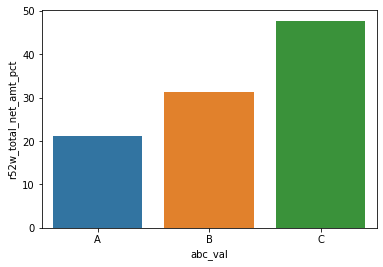

In [154]:
df_distributions = df.groupby(['abc_val'])['r52w_total_net_amt_pct'].sum().reset_index()
sns.barplot(x = 'abc_val', y = 'r52w_total_net_amt_pct', data = df_distributions)

In [155]:
df.r52w_cov_net_amt.describe()

count    185.000000
mean       0.628185
std        0.156971
min        0.000000
25%        0.547103
50%        0.636726
75%        0.722107
max        1.106889
Name: r52w_cov_net_amt, dtype: float64

In [162]:
cov_conditions = [(df.r52w_cov_net_amt < .5),
                  ((df.r52w_cov_net_amt < .75) & (df.r52w_cov_net_amt > .5))
                 ]
cov_choices = ['X', 'Y']
df['cov_xyz_val'] = np.select(cov_conditions, cov_choices, 'Z')
df

,week_start_date,week_end_date,consumer_selling_cd,smic_group_cd,upc_id,store_id,rog_id,total_gross_amt,total_item_qty,total_mkdn_qty,...,r52w_cov_mkdn_wod_alloc_amt,r52w_cov_mkdn_pod_alloc_amt,r52w_total_net_amt_pct,r52w_total_net_amt_pct_cumsum,r52w_total_net_amt_cumsum,abc_val,SKU_ID,SKU_%,cov_abc_val,cov_xyz_val
118,2022-12-04,2022-12-10,146735,25,5100005937,326,AVMT,4.98,2,0,...,NaN,NaN,0.020127,100.000000,49485.30,C,185,64.324324,X,X
87,2022-12-04,2022-12-10,146727,25,5100003868,326,AVMT,3.99,1,1,...,NaN,NaN,0.032232,99.979873,49475.34,C,184,47.567568,Z,Y
148,2022-12-04,2022-12-10,146691,25,5100001467,326,AVMT,2.49,1,0,...,NaN,NaN,0.032777,99.947641,49459.39,C,183,80.540541,Y,X
37,2022-12-04,2022-12-10,437129,25,5100001327,326,AVMT,3.29,1,0,...,NaN,NaN,0.035768,99.914864,49443.17,C,182,20.540541,Z,Y
57,2022-12-04,2022-12-10,1203098,25,5100027856,326,AVMT,2.99,1,0,...,NaN,NaN,0.036253,99.842842,49407.53,C,181,31.351351,Z,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,2022-12-04,2022-12-10,146761,25,5100012114,326,AVMT,20.94,6,0,...,NaN,NaN,1.988247,12.176020,6025.34,A,5,92.432432,Z,Z
23,2022-12-04,2022-12-10,146408,25,4119601088,326,AVMT,39.90,10,3,...,NaN,-5.267273,2.155590,10.187773,5041.45,A,4,12.972973,Z,Y
158,2022-12-04,2022-12-10,146629,25,5100000011,326,AVMT,15.92,8,8,...,NaN,NaN,2.405300,8.032183,3974.75,A,3,85.945946,Z,Y
96,2022-12-04,2022-12-10,410691,25,4178900211,326,AVMT,37.50,75,0,...,NaN,-7.071068,2.670611,5.626883,2784.48,A,2,52.432432,Z,X


In [163]:
df['cov_xyz_val'].value_counts()

Y    121
Z     36
X     28
Name: cov_xyz_val, dtype: int64

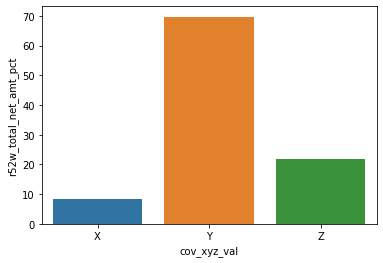

In [164]:
df_cov_distributions = df.groupby(['cov_xyz_val'])['r52w_total_net_amt_pct'].sum().reset_index()
sns.barplot(x = 'cov_xyz_val', y = 'r52w_total_net_amt_pct', data = df_cov_distributions)